In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3
import matplotlib.pyplot as plt

# Useful Info For loading Data
https://www.kaggle.com/dimarudov/data-analysis-using-sql

Below we connect to the database

In [4]:
path = "C:/Users/leeji/OneDrive/Documents/github-desktop/input/"  #Insert path here
database = path + 'database.sqlite'

conn = sqlite3.connect(database)

We load att the games with home goal, away goal and betting odds for different companies

In [5]:
detailed_bets = pd.read_sql("""SELECT home_team_goal, 
                                        away_team_goal,
                                        B365H,
                                        B365D,
                                        B365A,
                                        BWH,
                                        BWD,
                                        BWA,
                                        IWH,
                                        IWD,
                                        IWA,
                                        LBH,
                                        LBD,
                                        LBA,
                                        PSH,
                                        PSD,
                                        PSA,
                                        WHH,
                                        WHD,
                                        WHA,
                                        VCH,
                                        VCD,
                                        VCA,
                                        GBH,
                                        GBD,
                                        GBA,
                                        BSH,
                                        BSD,
                                        BSA
                                        
                                        
                                FROM Match;""", conn)

detailed_bets.shape

(25979, 29)

We check all the columns and see if there are lots of NaNs, we noticed that certain betting companies have lots of them

We are dropping GB, BS, and PS betting companies because they have lots of nulls

In [6]:
detailed_bets_filtered = pd.read_sql("""SELECT home_team_goal, 
                                        away_team_goal,
                                        B365H,
                                        B365D,
                                        B365A,
                                        BWH,
                                        BWD,
                                        BWA,
                                        IWH,
                                        IWD,
                                        IWA,
                                        LBH,
                                        LBD,
                                        LBA,
                                        WHH,
                                        WHD,
                                        WHA,
                                        VCH,
                                        VCD,
                                        VCA
                                        
                                        
                                FROM Match;""", conn)

We drop all the matches that have lots of naans and get 17 000 games

In [7]:
cleaned_bets = detailed_bets_filtered.dropna(thresh=20) #drops vals if there are more than 1 Nan

cleaned_bets.shape

(22432, 20)

In [8]:
cleaned_bets['result'] = 0
cleaned_bets.loc[detailed_bets['home_team_goal'] < detailed_bets['away_team_goal'], 'result'] = -1
cleaned_bets.loc[detailed_bets['home_team_goal'] > detailed_bets['away_team_goal'], 'result'] = 1
cleaned_bets

C:\Users\leeji\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\leeji\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,home_team_goal,away_team_goal,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,...,LBH,LBD,LBA,WHH,WHD,WHA,VCH,VCD,VCA,result
0,1,1,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.20,...,1.80,3.30,3.75,1.70,3.30,4.33,1.65,3.40,4.50,0
1,0,0,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.20,...,1.90,3.20,3.50,1.83,3.30,3.60,2.00,3.25,3.25,0
2,0,3,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.10,...,2.50,3.20,2.50,2.50,3.25,2.40,2.35,3.25,2.65,-1
3,5,0,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.90,...,1.44,3.60,6.50,1.44,3.75,6.00,1.45,3.75,6.50,1
4,1,3,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.30,...,4.00,3.40,1.72,4.20,3.40,1.70,4.50,3.40,1.65,-1
5,1,1,4.75,3.40,1.67,4.85,3.40,1.65,3.70,3.20,...,5.00,3.25,1.62,4.20,3.40,1.70,4.35,3.40,1.70,0
6,2,2,2.10,3.20,3.30,2.05,3.25,3.15,1.85,3.20,...,1.83,3.30,3.60,1.83,3.30,3.60,2.10,3.25,3.00,0
7,1,2,3.20,3.40,2.20,2.55,3.30,2.40,2.40,3.20,...,2.50,3.20,2.50,2.70,3.25,2.25,2.80,3.25,2.25,-1
8,1,0,2.25,3.25,2.88,2.30,3.25,2.70,2.10,3.10,...,2.25,3.20,2.75,2.20,3.25,2.75,2.25,3.25,2.80,1
9,4,1,1.30,5.25,9.50,1.25,5.00,10.00,1.30,4.20,...,1.25,4.50,10.00,1.35,4.20,7.00,1.30,4.35,8.50,1


In [9]:
bets_percentage = cleaned_bets[cleaned_bets.columns[2:20]] #take all the COLUMNS and take the reciprocal

In [10]:
bets_percentage.rdiv(1)

,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,WHH,WHD,WHA,VCH,VCD,VCA
0,0.578035,0.294118,0.200000,0.571429,0.298507,0.238095,0.540541,0.312500,0.285714,0.555556,0.303030,0.266667,0.588235,0.303030,0.230947,0.606061,0.294118,0.222222
1,0.512821,0.312500,0.277778,0.555556,0.303030,0.253165,0.526316,0.312500,0.285714,0.526316,0.312500,0.285714,0.546448,0.303030,0.277778,0.500000,0.307692,0.307692
2,0.420168,0.303030,0.363636,0.416667,0.303030,0.392157,0.384615,0.322581,0.434783,0.400000,0.312500,0.400000,0.400000,0.307692,0.416667,0.425532,0.307692,0.377358
3,0.694444,0.266667,0.133333,0.714286,0.250000,0.147059,0.714286,0.256410,0.166667,0.694444,0.277778,0.153846,0.694444,0.266667,0.166667,0.689655,0.266667,0.153846
4,0.200000,0.285714,0.606061,0.200000,0.285714,0.625000,0.250000,0.303030,0.588235,0.250000,0.294118,0.581395,0.238095,0.294118,0.588235,0.222222,0.294118,0.606061
5,0.210526,0.294118,0.598802,0.206186,0.294118,0.606061,0.270270,0.312500,0.555556,0.200000,0.307692,0.617284,0.238095,0.294118,0.588235,0.229885,0.294118,0.588235
6,0.476190,0.312500,0.303030,0.487805,0.307692,0.317460,0.540541,0.312500,0.285714,0.546448,0.303030,0.277778,0.546448,0.303030,0.277778,0.476190,0.307692,0.333333
7,0.312500,0.294118,0.454545,0.392157,0.303030,0.416667,0.416667,0.312500,0.416667,0.400000,0.312500,0.400000,0.370370,0.307692,0.444444,0.357143,0.307692,0.444444
8,0.444444,0.307692,0.347222,0.434783,0.307692,0.370370,0.476190,0.322581,0.333333,0.444444,0.312500,0.363636,0.454545,0.307692,0.363636,0.444444,0.307692,0.357143
9,0.769231,0.190476,0.105263,0.800000,0.200000,0.100000,0.769231,0.238095,0.125000,0.800000,0.222222,0.100000,0.740741,0.238095,0.142857,0.769231,0.229885,0.117647


In [12]:
list(bets_percentage)

['B365H',
 'B365D',
 'B365A',
 'BWH',
 'BWD',
 'BWA',
 'IWH',
 'IWD',
 'IWA',
 'LBH',
 'LBD',
 'LBA',
 'WHH',
 'WHD',
 'WHA',
 'VCH',
 'VCD',
 'VCA']

In [12]:
home_win = bets_percentage.iloc[:,0:18:3]
away_win = bets_percentage.iloc[:,2:18:3]
draw = bets_percentage.iloc[:,1:18:3]

### Try plotting the correlation matrix

In [13]:
home_win = bets_percentage.rdiv(1).iloc[:,0:18:3]
away_win = bets_percentage.rdiv(1).iloc[:,2:18:3]
draw = bets_percentage.rdiv(1).iloc[:,1:18:3]
y = cleaned_bets['result'] # actual match outcomes

ValueError: all the input array dimensions except for the concatenation axis must match exactly

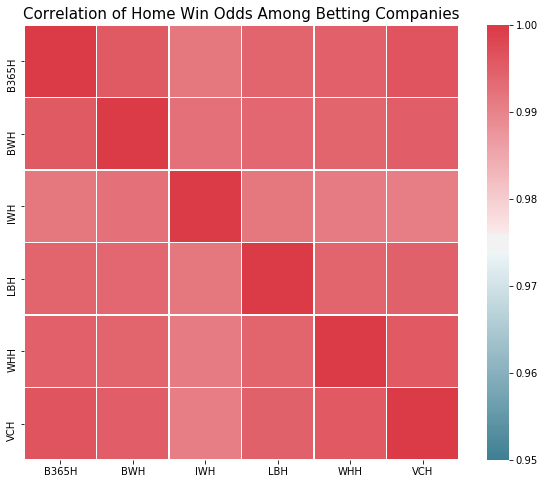

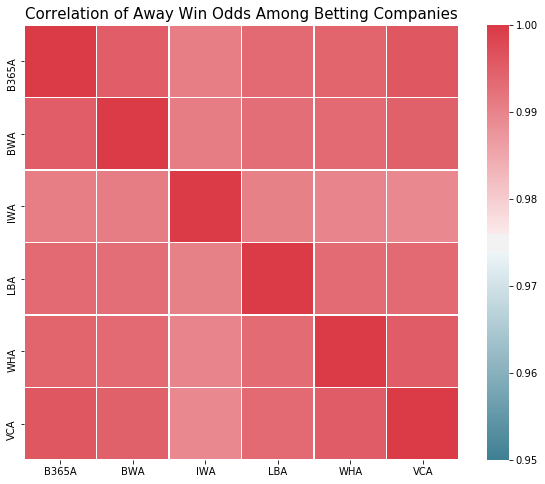

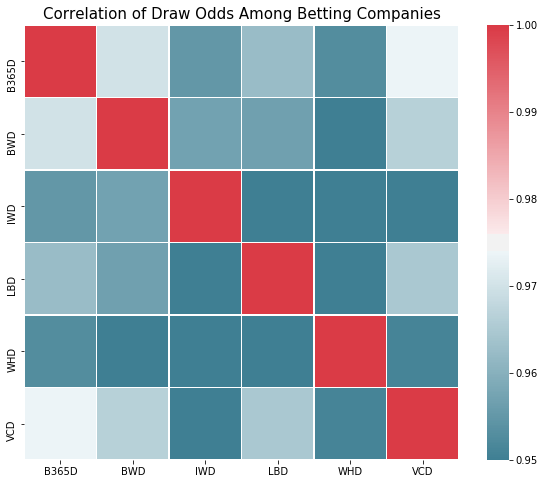

In [64]:
import seaborn as sns

arrays = [home_win, away_win, draw]
names = ['Home Win', 'Away Win' , 'Draw']

for array, name in zip(arrays, names): 
    f, ax = plt.subplots(figsize=(10, 8))
    corr = array.corr()
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, linewidths=.5,  vmin=0.95, vmax=1)
    plt.title("Correlation of %s Odds Among Betting Companies" % name, fontsize=15)
    plt.show()

### Try fitting a KNN classifier for B365 first using raw probabilities......

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# slice out probablities for each betting company
X_b365 = bets_percentage.rdiv(1).iloc[:,:3]
X_bw = bets_percentage.rdiv(1).iloc[:,3:6]
X_iw = bets_percentage.rdiv(1).iloc[:,6:9]
X_lb = bets_percentage.rdiv(1).iloc[:,9:12]
X_wh = bets_percentage.rdiv(1).iloc[:,12:15]
X_vc = bets_percentage.rdiv(1).iloc[:,15:18]
X_all = bets_percentage.rdiv(1)

X_comb = [X_b365, X_bw, X_iw, X_lb, X_wh, X_vc, X_all]

# the target classes
y = cleaned_bets['result'] # actual match outcomes
odds_company = ['b365', 'bw', 'iw', 'lb', 'wh', 'sj', 'vc', 'all']

cv_mean_knn = np.ones(7)

j=0

for X in X_comb:
        for i in range(1,301):
            
            cv_score = []
        
            # split into train and test
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

            # instantiate learning model (k = 11)
            knn = KNeighborsClassifier(n_neighbors=11, weights='uniform')
    
            # fitting the model
            knn.fit(X_train, y_train)

            # predict the response
            # pred = knn.predict(X_test)
            # print(accuracy_score(y_test, pred)) 
            scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
            cv_score.append(scores.mean())
        cv_mean_knn[j] = np.mean(cv_score)
        j+=1

In [69]:
print(cv_mean_knn)

[0.48484389 0.48822134 0.48103912 0.48671815 0.47958923 0.48259187
 0.48451224]


### Now try Naive Bayes........

In [71]:
from sklearn.naive_bayes import GaussianNB

cv_mean_nb = np.ones(7)

j=0

for X in X_comb:
        for i in range(1,301):
            
            cv_score = []
        
            # split into train and test
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

            # instantiate learning model (k = 11)
            GNB = GaussianNB()
    
            # fitting the model
            GNB.fit(X_train, y_train)

            # predict the response
            # pred = knn.predict(X_test)
            # print(accuracy_score(y_test, pred)) 
            scores = cross_val_score(GNB, X_train, y_train, cv=10, scoring='accuracy')
            cv_score.append(scores.mean())
        cv_mean_nb[j] = np.mean(cv_score)
        j+=1

In [72]:
print(cv_mean_nb)

[0.50596145 0.50788233 0.49981036 0.50736724 0.50478609 0.51215721
 0.47207731]


### Now QDA.....

In [74]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

cv_mean_qda = np.ones(7)

j=0

for X in X_comb:
        for i in range(1,301):
            
            cv_score = []
        
            # split into train and test
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

            # instantiate learning model (k = 11)
            qda = QDA()
    
            # fitting the model
            qda.fit(X_train, y_train)

            # predict the response
            # pred = knn.predict(X_test)
            # print(accuracy_score(y_test, pred)) 
            scores = cross_val_score(qda, X_train, y_train, cv=10, scoring='accuracy')
            cv_score.append(scores.mean())
        cv_mean_qda[j] = np.mean(cv_score)
        j+=1

In [75]:
print(cv_mean_qda)

[0.52538675 0.52688683 0.52379154 0.52557523 0.5211165  0.52548128
 0.50356759]


### Now LDA.....

In [76]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

cv_mean_lda = np.ones(7)

j=0

for X in X_comb:
        for i in range(1,301):
            
            cv_score = []
        
            # split into train and test
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

            # instantiate learning model (k = 11)
            lda = LDA()
    
            # fitting the model
            lda.fit(X_train, y_train)

            # predict the response
            # pred = knn.predict(X_test)
            # print(accuracy_score(y_test, pred)) 
            scores = cross_val_score(lda, X_train, y_train, cv=10, scoring='accuracy')
            cv_score.append(scores.mean())
        cv_mean_lda[j] = np.mean(cv_score)
        j+=1

C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: 

C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: 

C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: 

C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: 

C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: 

C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: 

C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: 

C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: 

C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: 

C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: 

C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: 

C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: 

C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: 

C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\leeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: 

In [77]:
print(cv_mean_lda)

[0.53195716 0.53148638 0.52928201 0.53214566 0.52956326 0.53163027
 0.53270699]


In [81]:
cv_scores = [cv_mean_knn, cv_mean_nb, cv_mean_lda, cv_mean_qda]

AttributeError: 'list' object has no attribute 'shape'

In [68]:
# library packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import neighbors
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from matplotlib import cm

### plot decision boundaries

# Build classifiers
gnb = GaussianNB()
qda = QDA()
lda = LDA()
knn = neighbors.KNeighborsClassifier(n_neighbors = 11)

# Train and Evaluate
names = ['GaussianNB', 'QDA' , 'LDA', 'kNN']
classifiers = [gnb, qda , lda, knn]

# create color maps
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFBBBB', '#BBFFBB', '#BBBBFF'])
cmap_bold = ListedColormap(['#CC0000', '#00AA00', '#0000CC'])

h = 0.1  # step size in the mesh

for ind in [0,1]:
    x_min, x_max = X_test[ind][:,0].min()-1, X_test[ind][:,0].max()+1
    y_min, y_max = X_test[ind][:,1].min()-1, X_test[ind][:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    print(xx.shape, yy.shape)
    grid = np.c_[xx.ravel(), yy.ravel()]

    labels = ['gnb', 'qda']
    models = [gnb, qda]
    plt.figure(figsize=(12,5))
    counter=1
    for label, clf in zip(labels, models):
        plt.subplot(1,2,counter)
        counter+=1
        clf.fit(X_train[ind], y_train[ind])
        yhat = clf.predict(X_test[ind])

        ZZ = clf.predict(grid)
        ZZ = ZZ.reshape(xx.shape) # 2-D grid layout

        # Plot the decision boundary. For that, we will assign a color to each grid point
        plt.pcolormesh(xx, yy, ZZ, cmap=cmap_light)

        # Plot also the training points
        plt.scatter(X_test[ind][:,0], X_test[ind][:,1], c=yhat, cmap=cmap_bold)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title(label + '\nError Rate = {:0.2f}%'.format((yhat != y_test[ind]).sum() * 100 / len(y_test[ind])))
    plt.show()

KeyError: 0